## Tugas

1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara `male` dan `female` pada dataset `voice.csv`.
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai k yang terbaik? Lampirkan grafik analisis dan alasan Anda.

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# Load dataset voice.csv
import pandas as pd
df = pd.read_csv('../Dataset/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 n

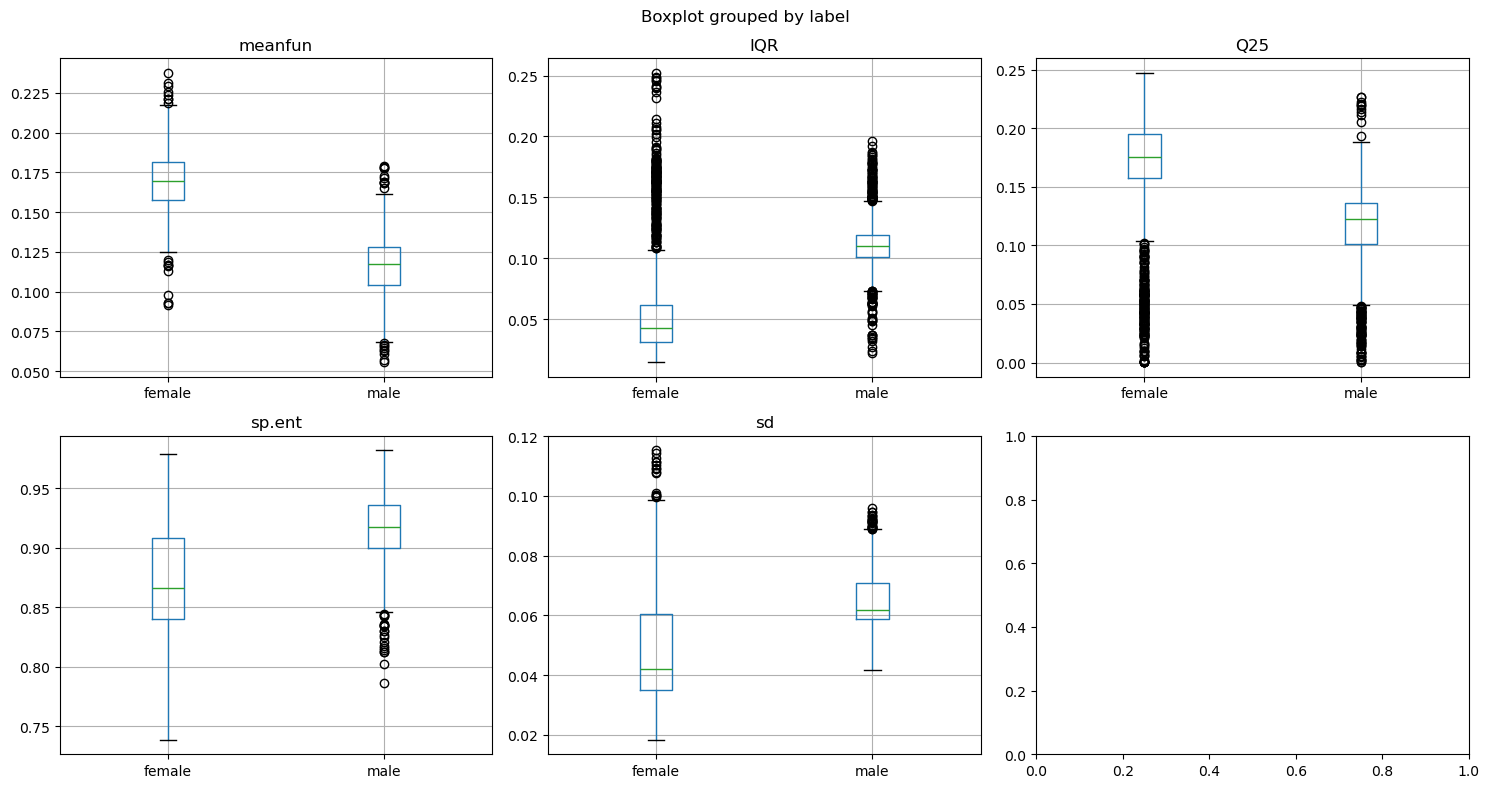


PILIHAN FITUR: Gunakan semua fitur untuk hasil optimal


In [8]:
# Eksplorasi data

print("Info Dataset:")
print("=" * 60)
print(df.info())

print("\nShape:", df.shape)
print("\n" + "=" * 60)
print("\nNilai unik label:")
print(df['label'].value_counts())

# Cek korelasi fitur dengan label
print("\nKorelasi fitur dengan label (setelah encoding):")
le_temp = LabelEncoder()
df_corr = df.copy()
df_corr['label_encoded'] = le_temp.fit_transform(df_corr['label'])

correlations = df_corr.drop('label', axis=1).corrwith(df_corr['label_encoded']).abs().sort_values(ascending=False)
print(correlations.head(10))

# Visualisasi top 5 fitur dengan korelasi tertinggi
print("\nTop 5 fitur dengan korelasi tertinggi:")
top_features = correlations.index[1:6].tolist()  # Skip 'label_encoded' (index 0) and take next 5
print(top_features)

# Plot distribusi top features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, feature in enumerate(top_features):
    ax = axes[idx // 3, idx % 3]
    df.boxplot(column=feature, by='label', ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

print("\nPILIHAN FITUR: Gunakan semua fitur untuk hasil optimal")

In [9]:
# Preprocessing data

print("Preprocessing Data...\n")

# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

print(f"Jumlah fitur: {X.shape[1]}")
print(f"Fitur yang digunakan: {X.columns.tolist()[:5]}... (total {X.shape[1]} fitur)")

# Encode label (male=1, female=0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nLabel encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

print(f"\nData training: {X_train.shape}")
print(f"Data testing: {X_test.shape}")

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nMean fitur training: {X_train_scaled.mean(axis=0)[:3]}... (mendekati 0)")
print(f"Std fitur training: {X_train_scaled.std(axis=0)[:3]}... (mendekati 1)")
print("\nStandardisasi selesai!")

Preprocessing Data...

Jumlah fitur: 20
Fitur yang digunakan: ['meanfreq', 'sd', 'median', 'Q25', 'Q75']... (total 20 fitur)

Label encoding: {'female': np.int64(0), 'male': np.int64(1)}

Data training: (2217, 20)
Data testing: (951, 20)

Mean fitur training: [-3.47739679e-16  1.48230047e-17 -5.23212005e-16]... (mendekati 0)
Std fitur training: [1. 1. 1.]... (mendekati 1)

Standardisasi selesai!


Mencari nilai k optimal...

k= 1 | Train Acc: 1.0000 | Test Acc: 0.9779
k= 1 | Train Acc: 1.0000 | Test Acc: 0.9779
k= 6 | Train Acc: 0.9811 | Test Acc: 0.9748
k= 6 | Train Acc: 0.9811 | Test Acc: 0.9748
k=11 | Train Acc: 0.9720 | Test Acc: 0.9664
k=11 | Train Acc: 0.9720 | Test Acc: 0.9664
k=16 | Train Acc: 0.9657 | Test Acc: 0.9611
k=16 | Train Acc: 0.9657 | Test Acc: 0.9611
k=21 | Train Acc: 0.9599 | Test Acc: 0.9621
k=21 | Train Acc: 0.9599 | Test Acc: 0.9621
k=26 | Train Acc: 0.9562 | Test Acc: 0.9579
k=26 | Train Acc: 0.9562 | Test Acc: 0.9579

K OPTIMAL: 1 dengan akurasi test: 0.9779

K OPTIMAL: 1 dengan akurasi test: 0.9779


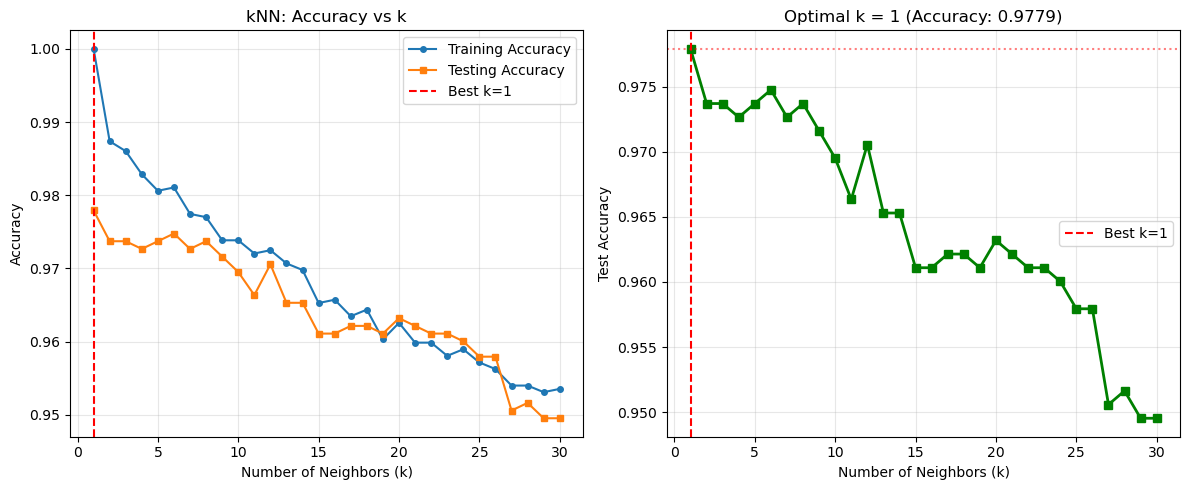


Training final model dengan k optimal...
Model training selesai!


In [10]:
# Cari nilai k optimal

print("Mencari nilai k optimal...\n")

k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    if k % 5 == 1:
        print(f"k={k:2d} | Train Acc: {train_score:.4f} | Test Acc: {test_score:.4f}")

# Temukan k terbaik
best_k = k_range[np.argmax(test_scores)]
best_accuracy = max(test_scores)

print("\n" + "=" * 60)
print(f"K OPTIMAL: {best_k} dengan akurasi test: {best_accuracy:.4f}")
print("=" * 60)

# Plot hasil
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, train_scores, label='Training Accuracy', marker='o', markersize=4)
plt.plot(k_range, test_scores, label='Testing Accuracy', marker='s', markersize=4)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN: Accuracy vs k')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, test_scores, marker='s', color='green', linewidth=2)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.axhline(y=best_accuracy, color='r', linestyle=':', alpha=0.5)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title(f'Optimal k = {best_k} (Accuracy: {best_accuracy:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Train final model dengan k optimal
print("\nTraining final model dengan k optimal...")
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
print("Model training selesai!")

HASIL EVALUASI MODEL

Akurasi: 0.9779 (97.79%)

Classification Report:
              precision    recall  f1-score   support

      female       0.98      0.98      0.98       476
        male       0.98      0.98      0.98       475

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951


RINGKASAN
Total data test: 951
Prediksi benar: 930
Prediksi salah: 21

Model berhasil mengklasifikasikan gender berdasarkan karakteristik suara!


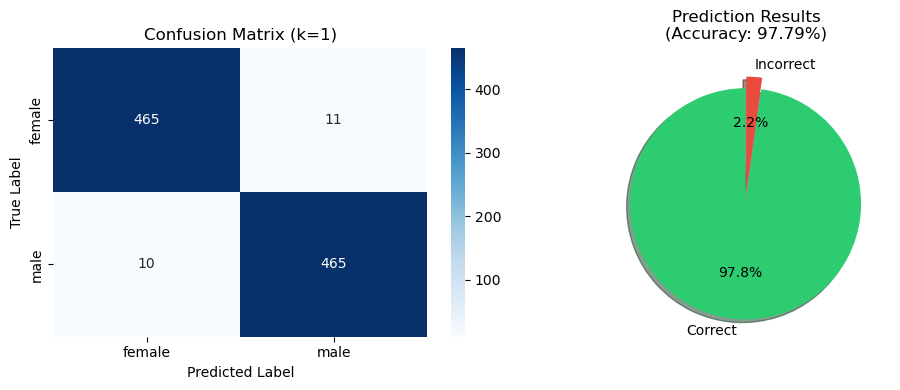

In [11]:
# Evaluasi model

y_pred = knn_final.predict(X_test_scaled)

print("=" * 60)
print("HASIL EVALUASI MODEL")
print("=" * 60)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\n" + "=" * 60)
print("RINGKASAN")
print("=" * 60)
print(f"Total data test: {len(y_test)}")
print(f"Prediksi benar: {np.sum(y_test == y_pred)}")
print(f"Prediksi salah: {np.sum(y_test != y_pred)}")
print(f"\nModel berhasil mengklasifikasikan gender berdasarkan karakteristik suara!")

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix (k={best_k})')

# Visualisasi perbandingan prediksi
plt.subplot(1, 2, 2)
sizes = [np.sum(y_test == y_pred), np.sum(y_test != y_pred)]
labels = ['Correct', 'Incorrect']
colors = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title(f'Prediction Results\n(Accuracy: {accuracy:.2%})')

plt.tight_layout()
plt.show()

## Kesimpulan

**Fitur yang digunakan:**

(Tuliskan fitur-fitur yang Anda pilih dan alasannya)

**Nilai k optimal:**

(Tuliskan nilai k terbaik dan alasannya berdasarkan grafik)

**Akurasi yang dicapai:**

(Tuliskan hasil akurasi model Anda)